In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
data = pd.read_csv('enhanced_dataset.csv')

C:\Users\HP 430 G8\AppData\Local\Temp\ipykernel_1044\92947512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DeviceId', data=data, palette='viridis')


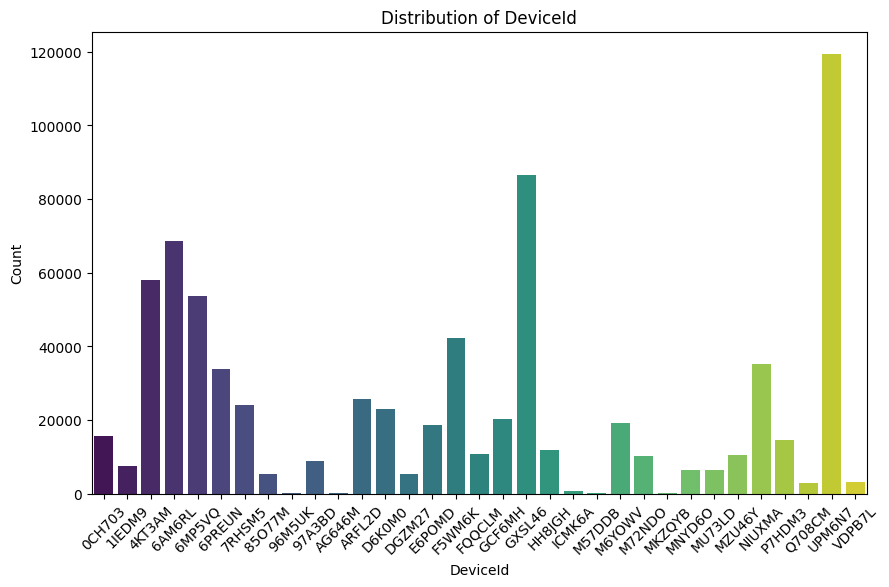

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of DeviceId
plt.figure(figsize=(10, 6))
sns.countplot(x='DeviceId', data=data, palette='viridis')
plt.title('Distribution of DeviceId')
plt.xlabel('DeviceId')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Select Features

In [30]:
features = [
    'FlightTime', 'KeyHoldTime', 'TypingSpeed', 'KeySequenceChangeRate',
    'InterKeyInterval_Mean', 'InterKeyInterval_Std', 'Burstiness',
    'TransitionEntropy', 'HMM_LogLikelihood_PerUser', 'HMM_HiddenState',
    'HMM_HiddenState_TransitionCount', 'HMM_HiddenState_Duration',
    'TimeSinceLastKeyPress', 'AvgSessionLength'
]
X = data[features]


Encode DeviceId into numerical

In [31]:
# Encode KeyPressed into numerical values
label_encoder = LabelEncoder()
data['DeviceIdEncoded'] = label_encoder.fit_transform(data['DeviceId'])
y = data['DeviceIdEncoded']  # Target variable

In [32]:
print(y)

0          0
1          0
2          0
3          0
4          0
          ..
748169    32
748170    32
748171    32
748172    32
748173    32
Name: DeviceIdEncoded, Length: 748174, dtype: int64


In [33]:
from imblearn.over_sampling import SMOTE



# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=features)
resampled_data['DeviceIdEncoded'] = y_resampled

# Verify the new distribution
print("Resampled dataset distribution:\n", resampled_data['DeviceIdEncoded'].value_counts())

Resampled dataset distribution:
 DeviceIdEncoded
0     119487
1     119487
2     119487
3     119487
4     119487
5     119487
6     119487
7     119487
8     119487
9     119487
10    119487
11    119487
12    119487
13    119487
14    119487
15    119487
16    119487
17    119487
18    119487
19    119487
20    119487
21    119487
22    119487
23    119487
24    119487
25    119487
26    119487
27    119487
28    119487
29    119487
30    119487
31    119487
32    119487
Name: count, dtype: int64


Handle Missing Values:
Check for missing values and handle them (e.g., fill with mean/median or drop rows/columns).

C:\Users\HP 430 G8\AppData\Local\Temp\ipykernel_1044\3648766338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DeviceIdEncoded', data=resampled_data, palette='viridis')


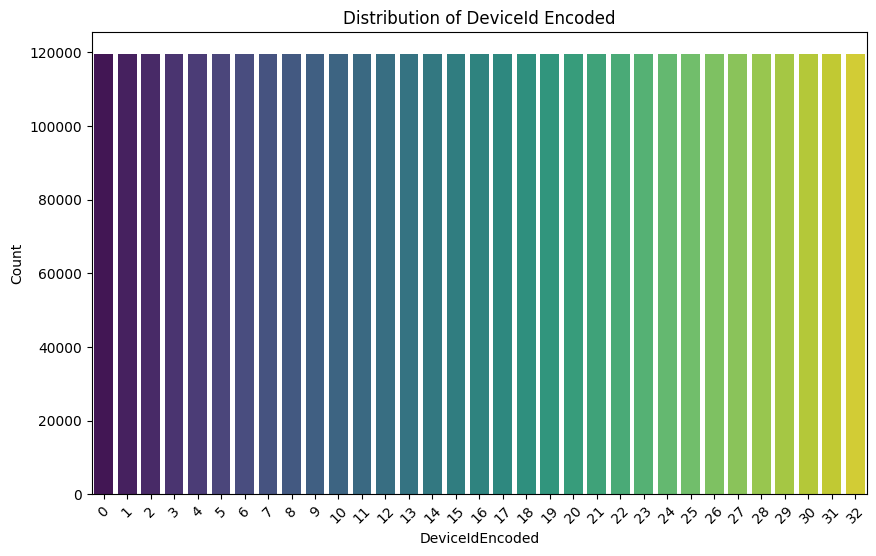

In [34]:
# Plot the distribution of DeviceId
plt.figure(figsize=(10, 6))
sns.countplot(x='DeviceIdEncoded', data=resampled_data, palette='viridis')
plt.title('Distribution of DeviceId Encoded')
plt.xlabel('DeviceIdEncoded')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [35]:
X_resampled = X_resampled.fillna(0)  # Example: Fill missing values with median

Normalize/Standardize Features:
Scale the features to ensure they are on a similar scale.

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

Train-Test Split:
Split the data into training and testing sets.

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=5, stratify=y_resampled)

In [38]:
y_test.to_csv('train_dataset2.csv', index=False)

Model Selection and Training
You can test multiple models and evaluate their performance. Here’s an example using Random Forest, XGBoost, and Logistic Regression:

In [39]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Define models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        if y_proba.shape[1] > 1:
            y_proba = y_proba[:, 1]  # Take the probability of the positive class for binary classification
    else:
        y_proba = None

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        #'ROC-AUC': roc_auc_score(y_test, y_proba, multi_class='ovr') if y_proba is not None else None
    }

# Compare models
results_df = pd.DataFrame(results).T
print(results_df)


                    Accuracy  Precision    Recall  F1-Score
RandomForest        1.000000   1.000000  1.000000  1.000000
XGBoost             1.000000   1.000000  1.000000  1.000000
LogisticRegression  0.999996   0.999996  0.999996  0.999996


In [40]:
for name, model in models.items():
    # Training set performance
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Test set performance
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"{name}:")
    print(f"  Training Accuracy: {train_accuracy}")
    print(f"  Test Accuracy: {test_accuracy}")

RandomForest:
  Training Accuracy: 1.0
  Test Accuracy: 1.0
XGBoost:
  Training Accuracy: 1.0
  Test Accuracy: 1.0
LogisticRegression:
  Training Accuracy: 0.9999952901093383
  Test Accuracy: 0.9999957731786204


In [41]:
# Check feature variability for each DeviceId
for device_id in data['DeviceId'].unique():
    print(f"DeviceId: {device_id}")
    print(data[data['DeviceId'] == device_id][features].describe())

DeviceId: 0CH703
         FlightTime   KeyHoldTime   TypingSpeed  KeySequenceChangeRate  \
count  15532.000000  15532.000000  15532.000000           15532.000000   
mean       0.032921      0.035774    -21.420728               0.000064   
std        1.092657      1.263848     19.739866               0.000000   
min       -0.045044     -0.045010  -2184.149001               0.000064   
25%       -0.045027     -0.044997    -22.215744               0.000064   
50%       -0.045023     -0.044990    -22.210331               0.000064   
75%       -0.045011     -0.044975    -22.208167               0.000064   
max       55.324185     77.475388    656.893314               0.000064   

       InterKeyInterval_Mean  InterKeyInterval_Std    Burstiness  \
count           15532.000000          1.553200e+04  1.553200e+04   
mean                0.032921          1.092657e+00  9.415040e-01   
std                 0.000000          2.220518e-16  1.110259e-16   
min                 0.032921          1.0926